In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

2024-02-01 10:36:30.001942: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 10:36:30.002037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 10:36:30.122762: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_path='/kaggle/input/intel-image-classification/seg_train/seg_train'
validation_path='/kaggle/input/intel-image-classification/seg_test/seg_test'

In [3]:
image_size=[224,224]

In [4]:
vgg=VGG16(input_shape=image_size+[3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 1s 0us/step


In [6]:
for layer in vgg.layers:
    layer.trainable=False

In [7]:
from glob import glob

In [8]:
folders=glob('/kaggle/input/intel-image-classification/seg_train/seg_train/*')

In [9]:
len(folders)

6

In [10]:
from keras.applications.vgg16 import preprocess_input

In [13]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input
                                 ,rotation_range=0,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                brightness_range=None,
                                shear_range=0.2,
                                zoom_range=0.2,
                                channel_shift_range=0.2,
                                fill_mode='nearest',
                                cval=0.0,
                                horizontal_flip=True)

validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input
                                 ,rotation_range=0,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                brightness_range=None,
                                shear_range=0.2,
                                zoom_range=0.2,
                                channel_shift_range=0.2,
                                fill_mode='nearest',
                                cval=0.0,
                                horizontal_flip=True)

In [12]:
train_ds=train_datagen.flow_from_directory(directory=train_path,
                                           target_size=(224,224),
                                           class_mode='categorical',
                                           batch_size=32)

validation_ds=validation_datagen.flow_from_directory(directory=validation_path,
                                           target_size=(224,224),
                                           class_mode='categorical',
                                           batch_size=32)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [16]:
model_history=model.fit(train_ds,validation_data=validation_ds,epochs=10)

Epoch 1/10
439/439 [==============================] - 266s 605ms/step - loss: 4.7235 - accuracy: 0.8556 - val_loss: 5.4692 - val_accuracy: 0.8703
Epoch 2/10
439/439 [==============================] - 192s 438ms/step - loss: 5.1924 - accuracy: 0.8784 - val_loss: 5.9760 - val_accuracy: 0.8807
Epoch 3/10
439/439 [==============================] - 194s 441ms/step - loss: 5.3412 - accuracy: 0.8896 - val_loss: 7.3776 - val_accuracy: 0.8653
Epoch 4/10
439/439 [==============================] - 192s 436ms/step - loss: 5.1840 - accuracy: 0.8946 - val_loss: 7.5336 - val_accuracy: 0.8763
Epoch 5/10
439/439 [==============================] - 193s 440ms/step - loss: 5.6756 - accuracy: 0.8926 - val_loss: 8.8112 - val_accuracy: 0.8697
Epoch 6/10
439/439 [==============================] - 190s 432ms/step - loss: 5.6063 - accuracy: 0.9007 - val_loss: 7.9790 - val_accuracy: 0.8887
Epoch 7/10
439/439 [==============================] - 191s 435ms/step - loss: 5.6223 - accuracy: 0.9007 - val_loss: 7.9054 -

In [17]:
import matplotlib.pyplot as plt

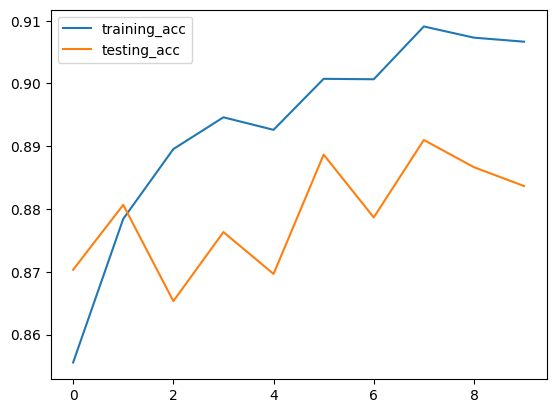

In [18]:
plt.plot(model_history.history['accuracy'],label='training_acc')
plt.plot(model_history.history['val_accuracy'],label='testing_acc')
plt.legend()
plt.show()

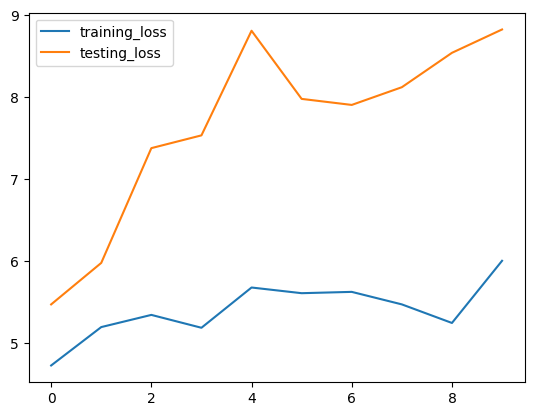

In [19]:
plt.plot(model_history.history['loss'],label='training_loss')
plt.plot(model_history.history['val_loss'],label='testing_loss')
plt.legend()
plt.show()

In [20]:
from keras.models import load_model

In [21]:
model.save('intel_features.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
y_test=validation_ds.classes

In [28]:
y_pred=model.predict(validation_ds)
y_pred=np.argmax(y_pred,axis=1)

94/94 [==============================] - 33s 348ms/step


In [31]:
y_pred

array([0, 4, 3, ..., 4, 5, 5])

In [60]:
test_img=cv2.imread('/kaggle/input/intel-image-classification/seg_test/seg_test/street/20075.jpg')

In [61]:
test_img=cv2.resize(test_img,(224,224))

In [62]:
test_input=test_img.reshape(1,224,224,3)

In [63]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

In [64]:
categories=['buildings','forest','glacier','mountain','sea','street']

In [65]:
pred_name=categories[np.argmax(model.predict(test_input))]
pred_name

1/1 [==============================] - 0s 19ms/step


'street'